## About dataset
### Kaggle Competition | Titanic Machine Learning from Disaster

>The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.  This sensational tragedy shocked the international community and led to better safety regulations for ships.

>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.  Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

>In this contest, we ask you to complete the analysis of what sorts of people were likely to survive.  In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

>This Kaggle Getting Started Competition provides an ideal starting place for people who may not have a lot of experience in data science and machine learning."

From the competition [homepage](http://www.kaggle.com/c/titanic-gettingStarted).



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Uncomment this if you are using Google Colab
!wget https://raw.githubusercontent.com/PrzemekSekula/DeepLearningClasses1/master/Titanic/train.csv

--2020-11-11 18:35:36--  https://raw.githubusercontent.com/PrzemekSekula/DeepLearningClasses1/master/Titanic/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv.1’

train.csv.1         100%[===================>]  58.89K  --.-KB/s    in 0.03s   

2020-11-11 18:35:36 (2.06 MB/s) - ‘train.csv.1’ saved [60302/60302]



## Loading dataframe
Let's read our data in using pandas:

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


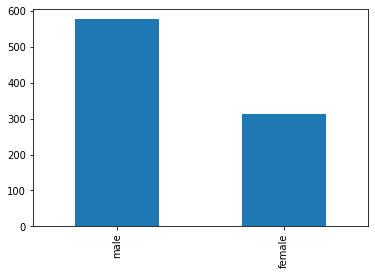

In [ ]:
df= pd.read_csv('./train.csv')

print(df.shape)
print(df.columns)

df.head()

### Data description

The files we read in the previous screen are available on the data page for the Titanic competition on Kaggle. That page also has a data dictionary, which explains the various columns that make up the data set. Below are the descriptions contained in that data dictionary:

- PassengerID - A column added by Kaggle to identify each row and make submissions easier
- Survived - Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass - The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex - The passenger's sex
- Age - The passenger's age in years
- SibSp - The number of siblings or spouses the passenger had aboard the Titanic
- Parch - The number of parents or children the passenger had aboard the Titanic
- Ticket - The passenger's ticket number
- Fare - The fare the passenger paid
- Cabin - The passenger's cabin number
- Embarked - The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

## Dealing with Null values

Let's count the missing values for all columns.

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Take care of missing values:
The features `cabin` has many missing values and so can’t add much value to our analysis. To handle this we will drop them from the dataframe to preserve the integrity of our dataset. It is also a good idea do delete the name of the passanger and the number of ticket - this data also cannot probably improve the quality of our predictions. Let's do it with pandas.

    df = df.drop(['ticket','cabin', 'Name'], axis=1) 

The next step is to do something with other missing values. Please note that we have 2 missing values in `Embarked` and 177 in `Age` columns. There are several possible solutions, one of them is simply delete all the rows with missing values. You can do it using the following pandas function.
   
    df = df.dropna()


In [ ]:
df = df.drop(['Ticket','Cabin','Name'],axis=1)

In [ ]:
df = df.dropna()

## Task 1 -  Let's take a look at our data 

### Task 1 a) Data analysis
Let's check:
- how many people survived, and how many don't *(hint - google for pandas value_counts)*
- what is the Passanger Class (`Pclass` column) distribution of our data
- what is the age distribution of our data *(hint - use pandas histogram)*

Survived
0    424
1    288
dtype: int64


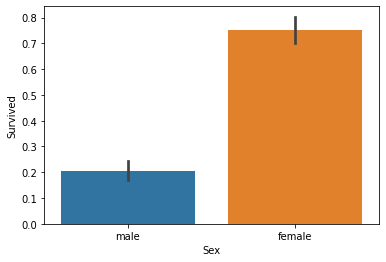

In [ ]:
print(df.value_counts('Survived'))

sns.barplot(x='Sex', y='Survived', data=df)
plt.show()
#being female increased chances of survival.



Pclass
1    184
2    173
3    355
dtype: int64


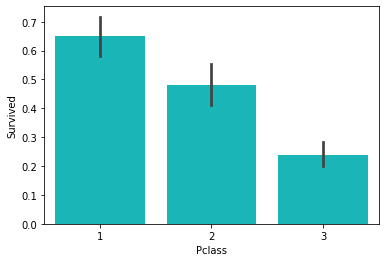

In [ ]:
print(df.value_counts('Pclass',  sort=False))
sns.barplot(x='Pclass', y='Survived', data=df, color="darkturquoise")
plt.show()
#being a first class passenger increased chances of survival.

(0.339, 4.399]      40
(4.399, 8.378]      14
(8.378, 12.357]     15
(12.357, 16.336]    31
(16.336, 20.315]    79
(20.315, 24.294]    98
(24.294, 28.273]    85
(28.273, 32.252]    84
(32.252, 36.231]    73
(36.231, 40.21]     44
(40.21, 44.189]     35
(44.189, 48.168]    35
(48.168, 52.147]    29
(52.147, 56.126]    16
(56.126, 60.105]    13
(60.105, 64.084]    10
(64.084, 68.063]     4
(68.063, 72.042]     5
(72.042, 76.021]     1
(76.021, 80.0]       1
Name: Age, dtype: int64


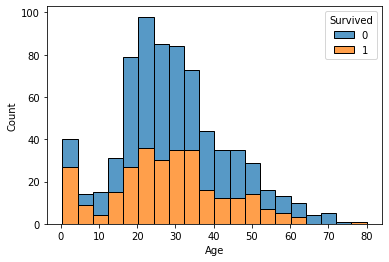

In [ ]:
sns.histplot(data = df, x='Age', hue='Survived', multiple='stack')
print(df['Age'].value_counts(bins=20,sort=False))

#Being a child and a teenager increased chances of survival.

df['IsYoung']=np.where(df['Age']<=20, 1, 0)

### Task 1b -  Correlation analysis 
Prepare the correlation analysis of the data. In analysis you should display the information about correlations between each pair of variables.

*Hint: You may google for `pandas correlation matrix heatmap` to find the solution

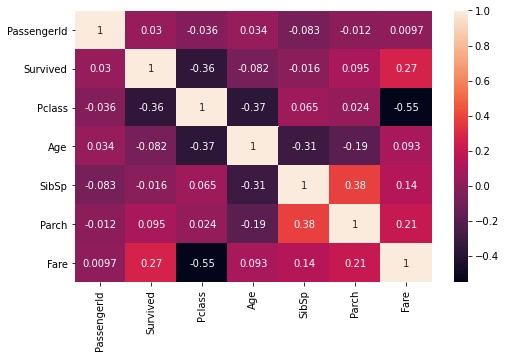

In [ ]:
correlation_matrix = df.corr()

plt.subplots(figsize=(8,5))
sns.heatmap(correlation_matrix, 
            annot=True)

## Task 2 - Select features and labels
Create the new dataframes/series:
- `X` - with the features
- `y` - with the labels

These dataframes should be ready to use train_test_split, and then to perform machine learning.

**Note: This task will be probably done iteratively - you may get back to this task every time you want to improve your results **

In [ ]:
x = df[['Parch','Fare', 'Sex']] # 78|76 1.685%
x = df[['Parch','Fare', 'Sex','Age']] # 78|77 0.936%
x = df[['Parch','Fare', 'Sex','Age','Pclass']] #79|78 1.124%
x = df[['Parch','Fare', 'Sex','Age','Pclass', 'IsYoung']] #79|79 0.375%

x.head()

,Parch,Fare,Sex,Age,Pclass,IsYoung
0,0,7.2500,male,22.0,3,0
1,0,71.2833,female,38.0,1,0
2,0,7.9250,female,26.0,3,0
3,0,53.1000,female,35.0,1,0
4,0,8.0500,male,35.0,3,0


In [ ]:
y = df['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Task 3 One-hot Encoding
Perform one-hot encoding if necessary. 

*Hint: Use `pd.get_dummies`*

In [ ]:
x = pd.get_dummies(x, columns=['Sex', 'Pclass'])
x.head()

,Parch,Fare,Age,IsYoung,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,7.2500,22.0,0,0,1,0,0,1
1,0,71.2833,38.0,0,1,0,1,0,0
2,0,7.9250,26.0,0,1,0,0,0,1
3,0,53.1000,35.0,0,1,0,1,0,0
4,0,8.0500,35.0,0,0,1,0,0,1


## Task 3 - Train test split
<img src="https://github.com/PrzemekSekula/DeepLearningClasses1/blob/master/Titanic/images/TrainTestSplit.jpg?raw=1">
Split the data into training and testing sets. Use the following parameters:
- Size of testing set = 25% of entire datasize
- Your training / testing sets should contain aproximately the same ratio of survived (use `stratify`)

In [ ]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, stratify = y, random_state=1)

In [ ]:
print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (534, 9)
x test:  (178, 9)
y train:  (534,)
y test:  (178,)


## Task 4 - Train your model
Create and train your model. You may use any model you wish.

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500).fit(x_train,y_train)

## Task 5 - Test your model
Test your model. If necessary change something and train your model again.
Your goal is to prepare the model with the accuracy >= 75%.

In [ ]:
print("Train set accuracy: {:.3%}".format(model.score(x_train,y_train)))
print("Test set accuracy: {:.3%}".format(model.score(x_test,y_test)))
print("Train and test difference: {:.3%}".format(model.score(x_train,y_train)-model.score(x_test,y_test)))

Train set accuracy: 80.337%
Test set accuracy: 78.090%
Train and test difference: 2.247%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(min_samples_leaf=1).fit(x_train,y_train)
print("Train set accuracy: {:.3%}".format(model.score(x_train,y_train)))
print("Test set accuracy: {:.3%}".format(model.score(x_test,y_test)))
print("Train and test difference: {:.3%}".format(model.score(x_train,y_train)-model.score(x_test,y_test)))


from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)
print("Train set accuracy: {:.3%}".format(model.score(x_train,y_train)))
print("Test set accuracy: {:.3%}".format(model.score(x_test,y_test)))
print("Train and test difference: {:.3%}".format(model.score(x_train,y_train)-model.score(x_test,y_test)))


Train set accuracy: 98.689%
Test set accuracy: 79.213%
Train and test difference: 19.476%
Train set accuracy: 82.397%
Test set accuracy: 69.101%
Train and test difference: 13.296%
